In [1]:
#Φορτώνω τις βιβλιοθήκες
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Δημιουργώ συνάρτηση που φορτώνει τα δεδομένα και φτιάχνει τις διαστάσεις τους
def load_dataset(folder, label):
    X = []
    for filename in os.listdir(os.path.join(folder, label)):
        img = Image.open(os.path.join(folder, label, filename))
        img = img.resize((64, 64))  
        img_array = np.array(img)
        print(f"Loaded image: {filename}, Shape: {img_array.shape}")
        X.append(img_array.flatten())
    return np.array(X)

In [3]:
#Δημιουργώ την σιγμοειδή συνάρτηση
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
#Δημιουργώ τον gradient descent 
def batch_gradient_descent(X, y, num_iterations=100, learning_rate=0.01):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  
    theta = np.zeros(n + 1)

    for iteration in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, y - h) / m
        theta += learning_rate * gradient

    return theta

In [5]:
# Φορτώνω τα δεδομένα
normal_images_train = load_dataset('', 'normal_modified')
tumor_images_train = load_dataset('', 'tumor_modified')

normal_images_test = load_dataset('', 'testnormal_modified')
tumor_images_test = load_dataset('', 'testtumor_modified')

Loaded image: 3 no.jpg, Shape: (64, 64)
Loaded image: 32 no.jpg, Shape: (64, 64)
Loaded image: 33 no.jpg, Shape: (64, 64)
Loaded image: 34 no.jpg, Shape: (64, 64)
Loaded image: 35 no.jpg, Shape: (64, 64)
Loaded image: 36 no.jpg, Shape: (64, 64)
Loaded image: 37 no.jpg, Shape: (64, 64)
Loaded image: 38 no.jpg, Shape: (64, 64)
Loaded image: 39 no.jpg, Shape: (64, 64)
Loaded image: 4 no.jpg, Shape: (64, 64)
Loaded image: 40 no.jpg, Shape: (64, 64)
Loaded image: 41 no.jpg, Shape: (64, 64)
Loaded image: 42 no.jpg, Shape: (64, 64)
Loaded image: 43 no.jpg, Shape: (64, 64)
Loaded image: 44no.jpg, Shape: (64, 64)
Loaded image: 45 no.jpg, Shape: (64, 64)
Loaded image: 46 no.jpg, Shape: (64, 64)
Loaded image: 47 no.jpg, Shape: (64, 64)
Loaded image: 48 no.jpeg, Shape: (64, 64)
Loaded image: 49 no.jpg, Shape: (64, 64)
Loaded image: 5 no.jpg, Shape: (64, 64)
Loaded image: 50 no.jpg, Shape: (64, 64)
Loaded image: 6 no.jpg, Shape: (64, 64)
Loaded image: 7 no.jpg, Shape: (64, 64)
Loaded image: 8 no.jp

In [19]:
# Φτιάχνω κλάσεις 0 για normal, 1 για tumor
y_train = np.concatenate((np.zeros(len(normal_images_train)), np.ones(len(tumor_images_train))))
y_test = np.concatenate((np.zeros(len(normal_images_test)), np.ones(len(tumor_images_test))))

# Συνενώνω τα δυο σετ δεδομένων
X_train = np.concatenate((normal_images_train, tumor_images_train))
X_test = np.concatenate((normal_images_test, tumor_images_test))

# Κάνω scaling στα δεδομένα
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Εκπαιδεύω το μοντέλο λογιστικής παλινδρόμησης χρησιμοποιώντας τον Batch Gradient Descent
theta = batch_gradient_descent(X_train_scaled, y_train)

In [21]:
# Προσθέτω bias στα δεδομένα μου και υπολογίζω τις προβλέψεις του μοντέλου
X_train_with_bias = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_with_bias = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

predictions_train = sigmoid(np.dot(X_train_with_bias, theta))
predictions_test = sigmoid(np.dot(X_test_with_bias, theta))

# Μετατρέπω τις προβλέψεις σε δυαδικές τιμες 1/0
binary_predictions_train = np.round(predictions_train)
binary_predictions_test = np.round(predictions_test)

In [22]:
# Υπολογίζω την ακρίβεια του μοντέλου για τα δεδομένα εκπαίδευσης και τα δεδομένα ελέγχου
accuracy_train = np.sum(binary_predictions_train == y_train) / len(y_train)
accuracy_test = np.sum(binary_predictions_test == y_test) / len(y_test)

print("Accuracy for Training Dataset:", accuracy_train)
print("Accuracy for Testing Dataset:", accuracy_test)

Accuracy for Training Dataset: 1.0
Accuracy for Testing Dataset: 0.725


In [10]:
print(confusion_matrix(binary_predictions_test, y_test))

[[14  5]
 [ 6 15]]


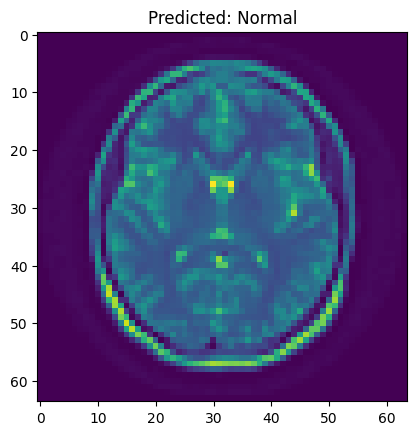

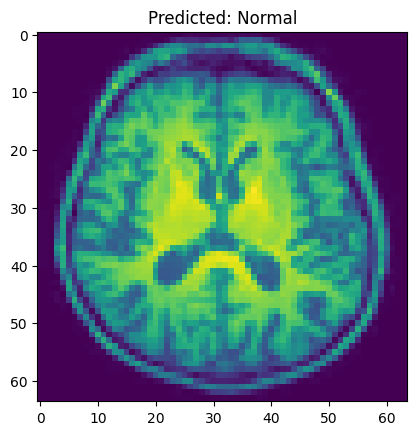

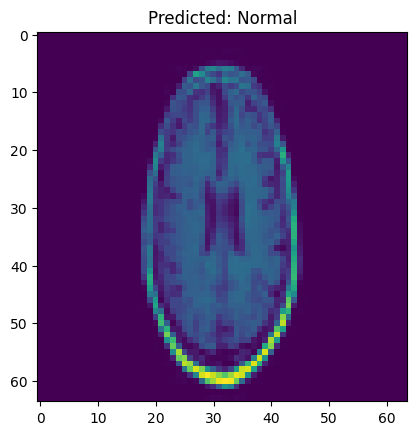

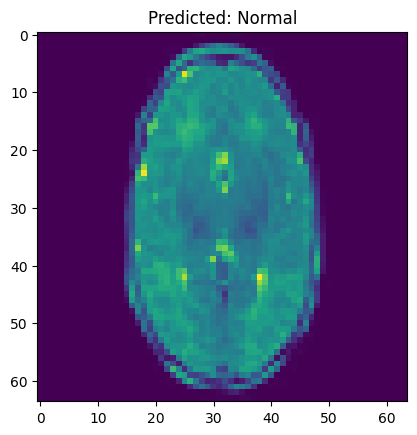

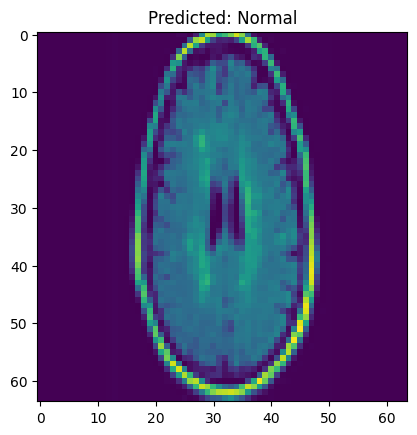

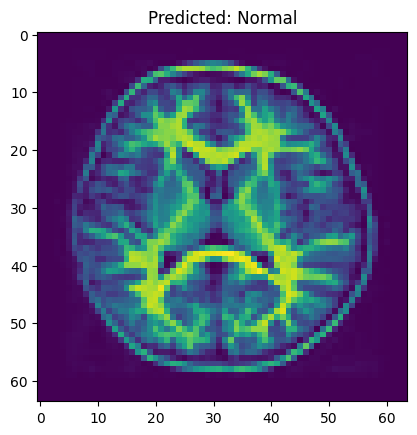

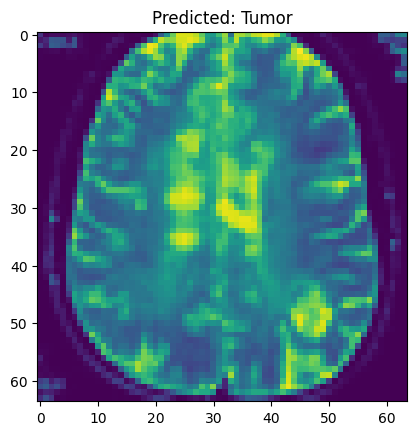

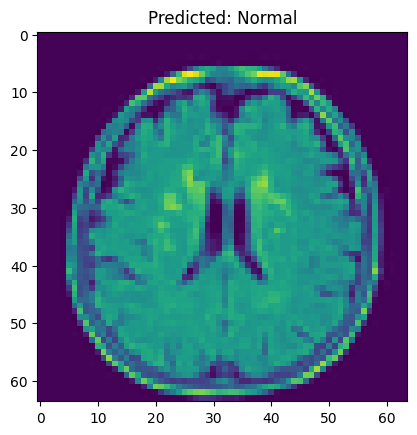

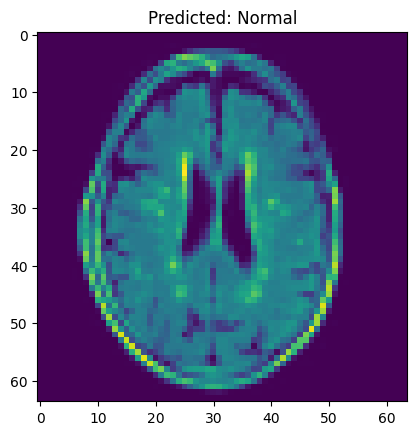

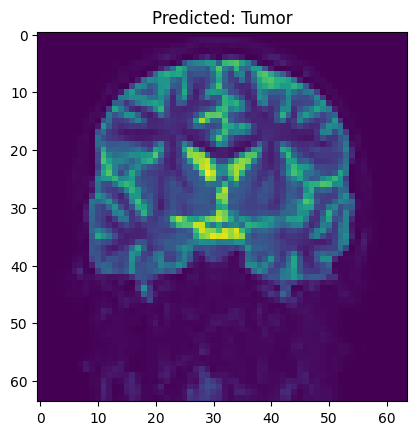

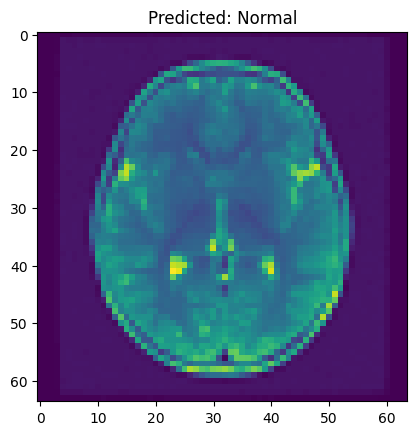

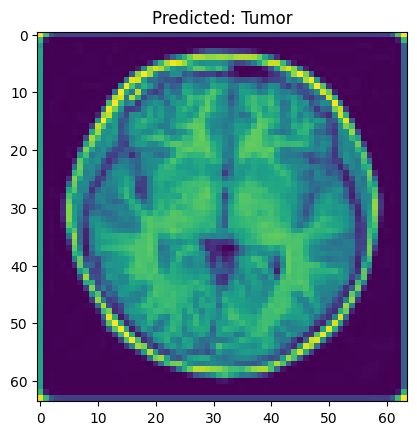

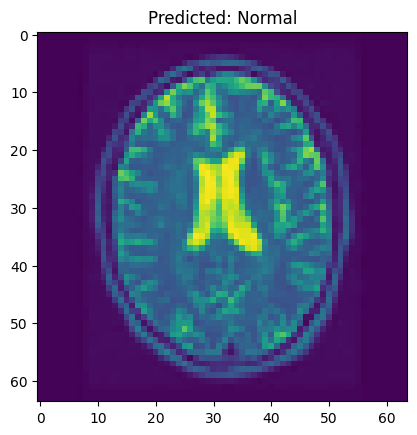

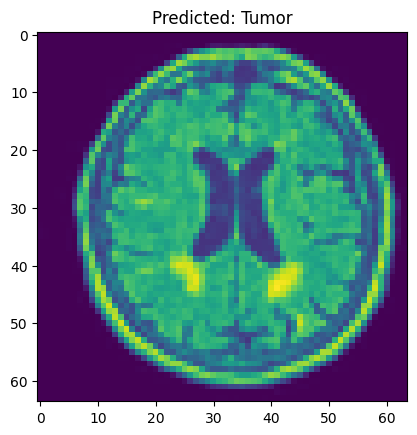

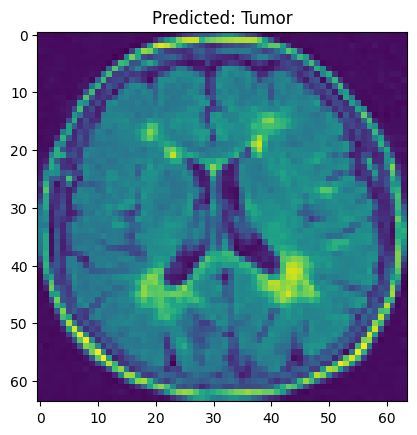

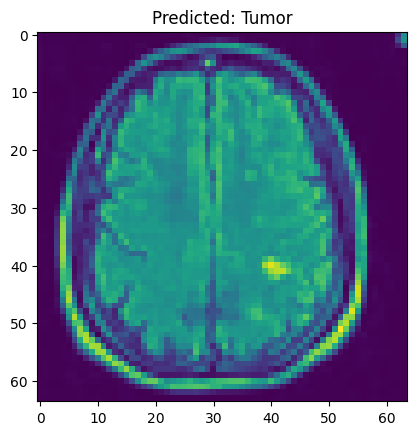

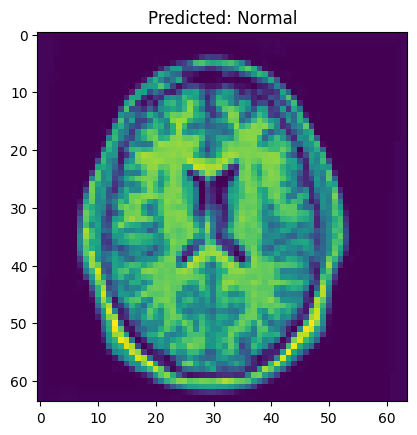

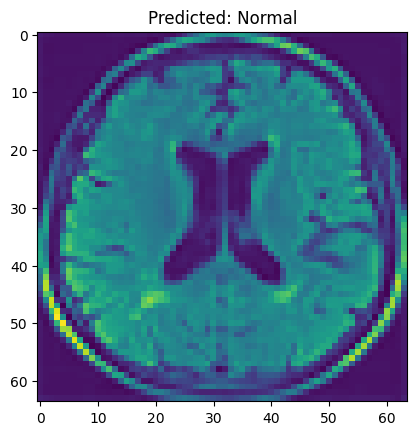

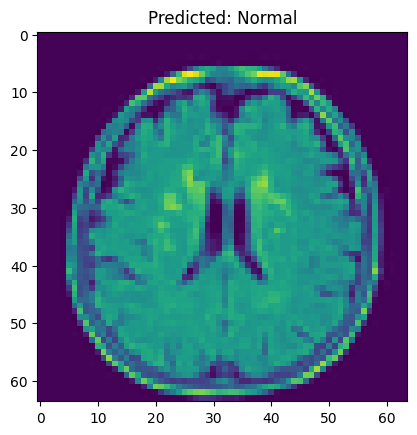

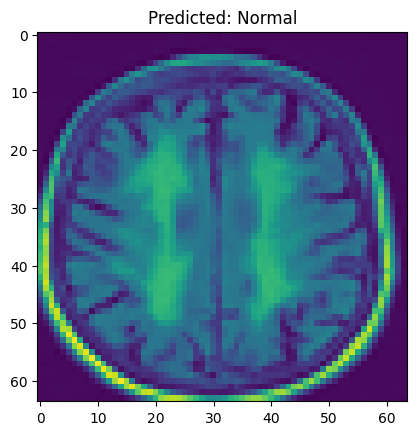

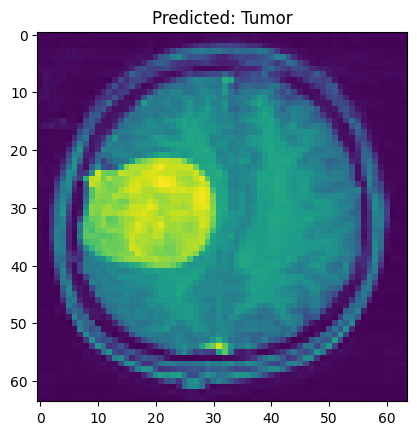

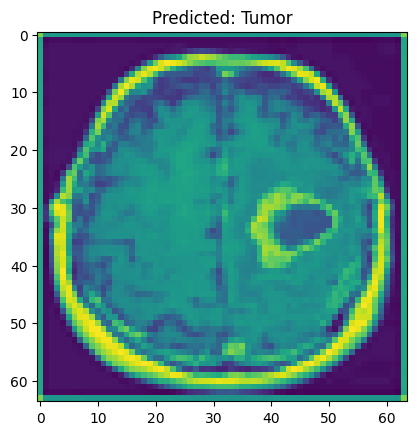

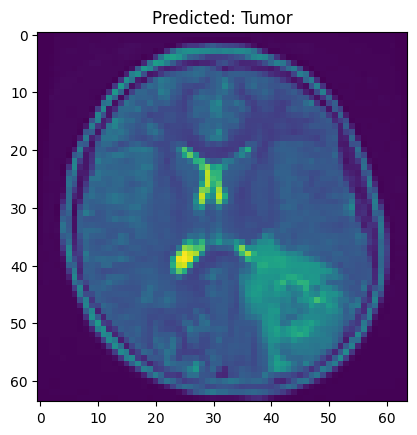

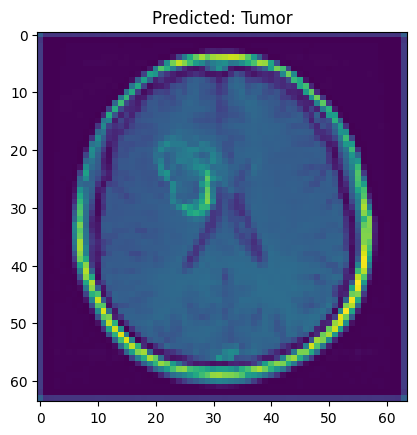

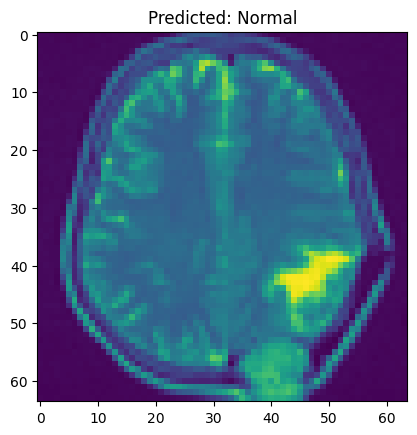

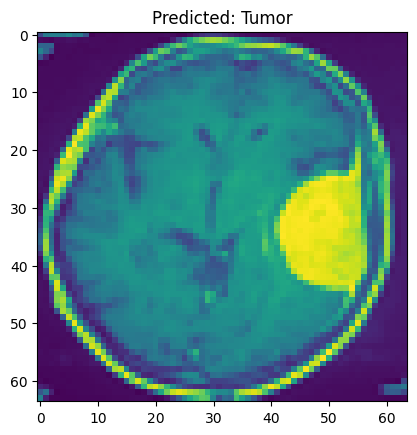

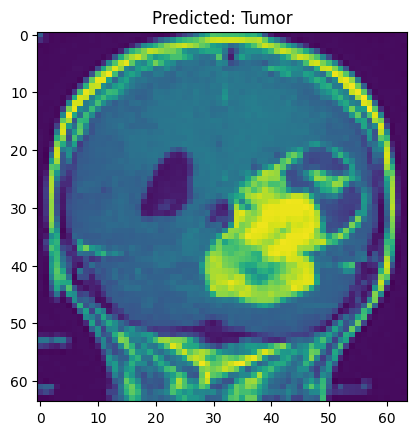

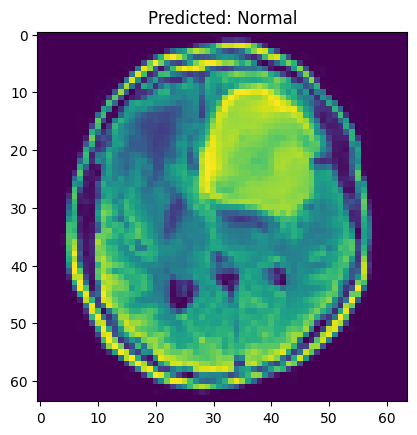

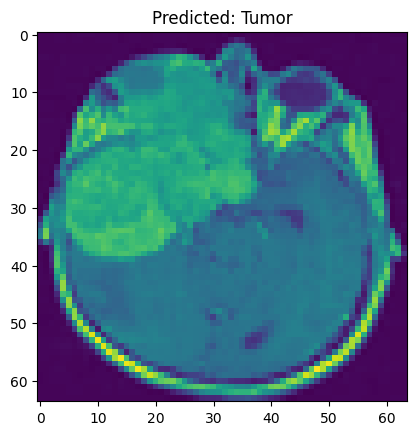

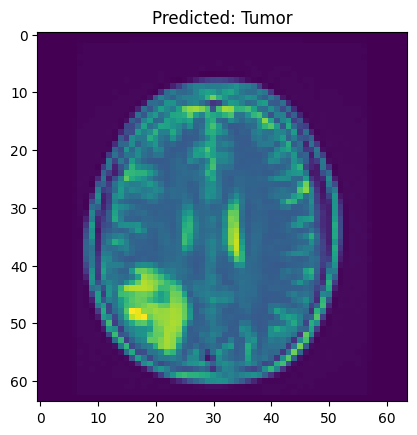

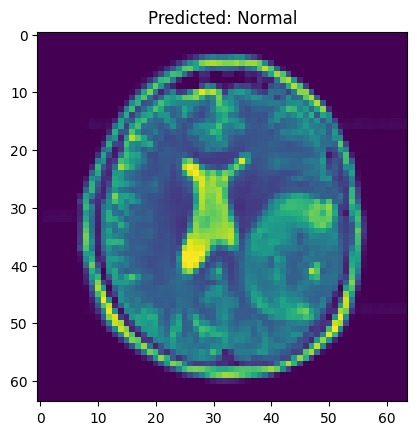

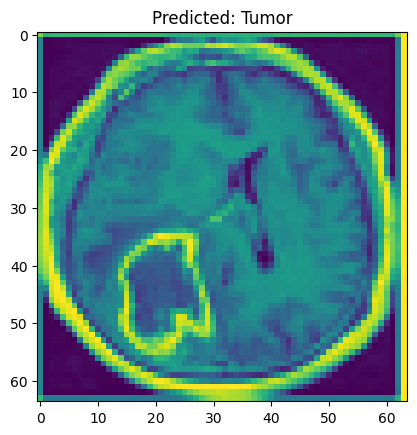

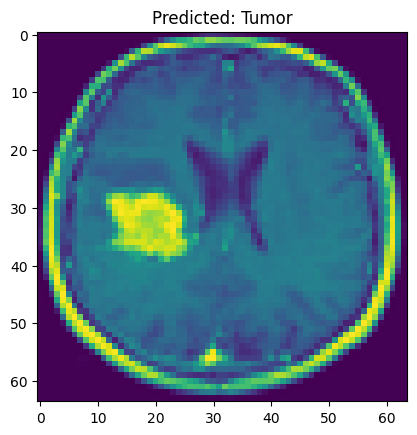

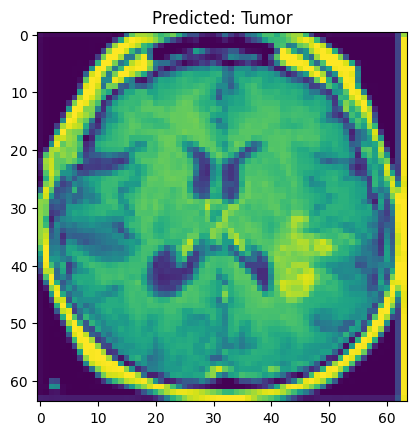

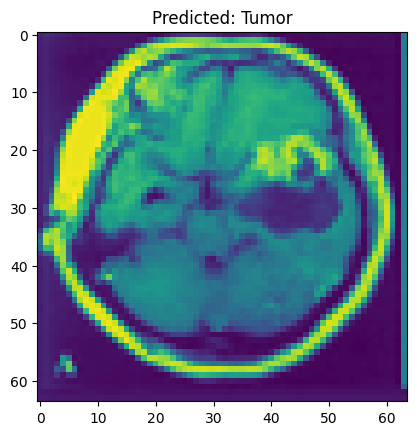

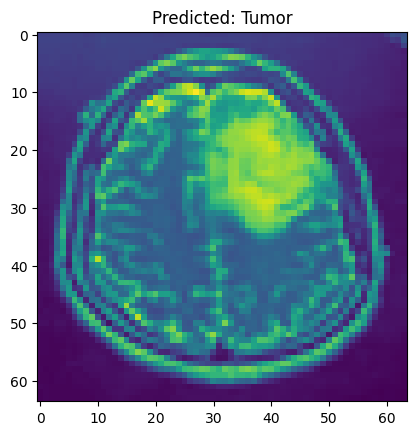

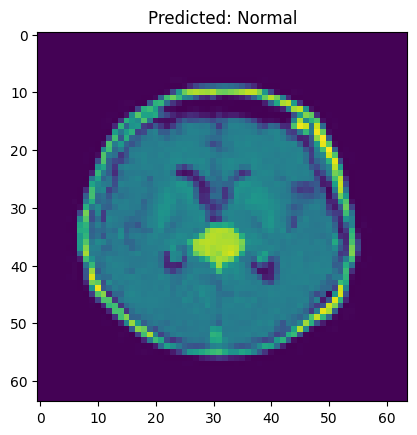

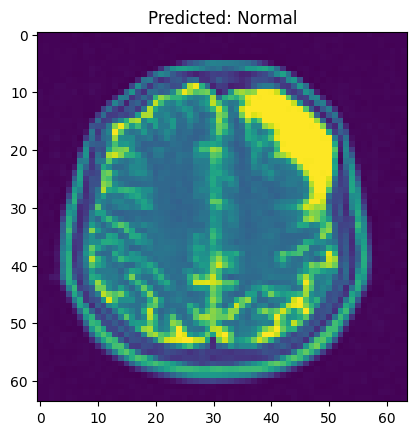

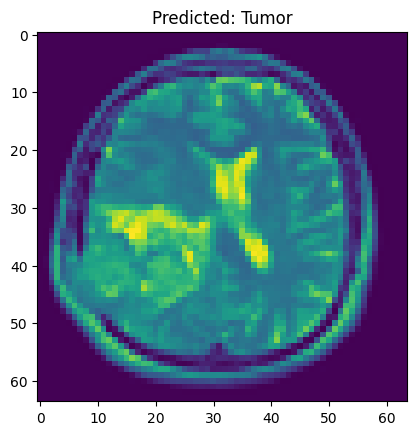

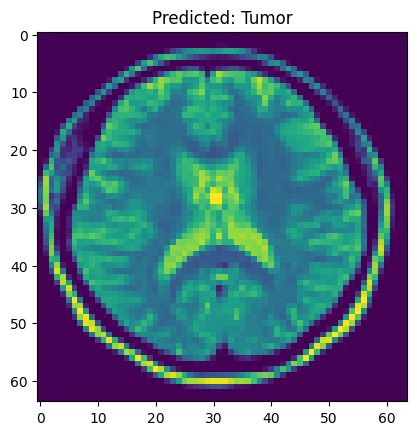

In [13]:
for i in range(len(binary_predictions_test)):
    img = Image.fromarray(X_test[i].reshape((64,64)))
    plt.imshow(img)
    
    if binary_predictions_test[i] == 0:
        plt.title("Predicted: Normal")
    else:
        plt.title("Predicted: Tumor")
    plt.show()